In [68]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from plotnine import *
                                               

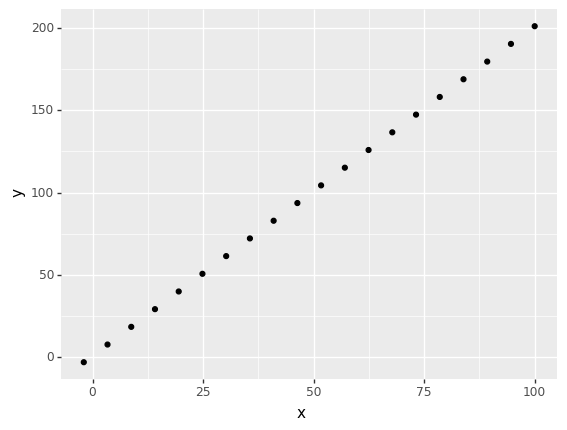

<ggplot: (-9223371873937799890)>

In [69]:
# Let us begin with a simple linear model where our dataset consists of a single explanatory variable.
# That is {(x_i,y_i}} where for all 1<=i<=n  y_i = beta_1 * x_i + beta_0.

beta1, beta0 = 2, 1
x = np.linspace(-2, 100, 20)
y = beta1*x + beta0

# Using geom_point we plot the data-points
df = DataFrame({'x':x, 'y':y})
ggplot(df, aes(x='x', y='y')) + geom_point()




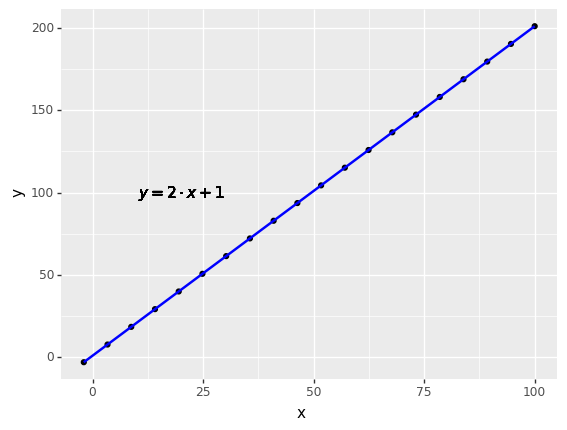

<ggplot: (-9223371873938134896)>

In [80]:
# Next, we are interested in plotting the regression line of y~x. Namely, asking how does x's change influence y.
# See geom_smooth documentation: https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_smooth.html
(ggplot(DataFrame({'x':x, 'y':y}), aes(x='x', y='y')) +
    geom_point() +
    geom_smooth(method="lm", color="blue") + 
    geom_text(x=20, y=100 ,label=r"$y={}\cdot x+{}$".format(beta1, beta0)))




In [82]:
# Over this simple dataset let us compute the linear regression and obtain the values of the coefficients beta0, beta1.
# As the data is noiseless, and resides exactly on a line, these coefficients will be the true beta0, beta1 rather than 
# estimator

from sklearn import linear_model
X = DataFrame({"x": x})
model = linear_model.LinearRegression()

# See here for LinearRegression.fit documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
# IMPORTANT - this function expects the data matrix X to be (nsamples, mfeatures) while in class we used 
# the transposed notation of (mfeatures, nsamples)
model.fit(X, y)
print("Fitted linear model over noiseless data: beta1={}, beta0={}".format(model.coef_[0], model.intercept_))




Fitted linear model over noiseless data: beta1=2.0, beta0=1.0


In [83]:
#The R^2 is a measurement of how much of the data variation the model manages to explain. Ranges from 0-1 
# where 1 means it explained all of the variation in the data    
r_sq = round(model.score(X, y), 2)
print("R^2={}".format(r_sq))




R^2=1.0


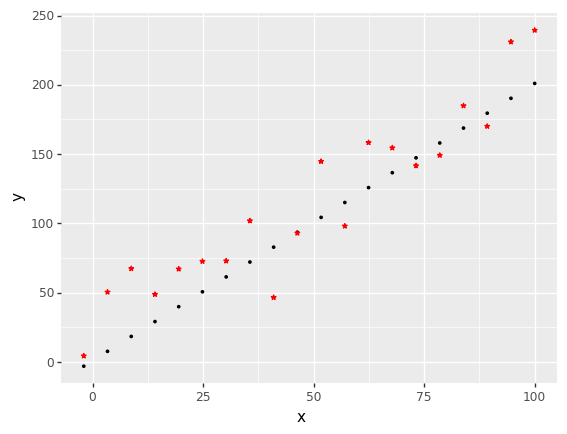

<ggplot: (-9223371873939947064)>

In [86]:
epsilon = np.random.normal(loc=10, scale=20, size=len(x))
y = beta1*x + beta0
y_noisy = beta1*x + beta0 + epsilon

(ggplot(DataFrame({'x':x, 'y':y, 'y_noisy':y_noisy})) + 
    geom_point(aes(x='x', y='y'), color="black", size=0.5) + 
    geom_point(aes(x='x', y='y_noisy'), color="red", shape="*", size=1.5))




In [87]:
model = linear_model.LinearRegression()
model.fit(X, y_noisy)
print("Fitted linear model over noiseless data: \nbeta1={}, beta0={}".format(model.coef_[0], model.intercept_))




Fitted linear model over noiseless data: 
beta1=1.8800740333324049, beta0=22.748507930029106


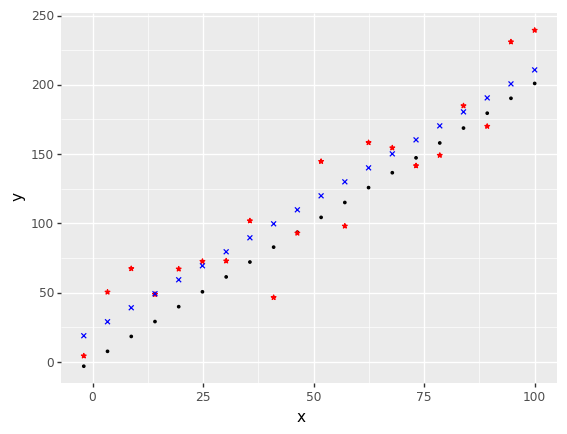

<ggplot: (162916266423)>

In [146]:
y_hat = model.predict(X)
df = DataFrame({'x':x, 'y':y, 'y_noisy':y_noisy, 'y_hat': y_hat }) 
(ggplot(df) + 
    geom_point(aes(x='x', y='y'), color="black", size=0.5) + 
    geom_point(aes(x='x', y='y_noisy'), color="red", shape="*", size=1.5) + 
    geom_point(aes(x='x', y='y_hat'), color="blue", shape="x", size=1.5))




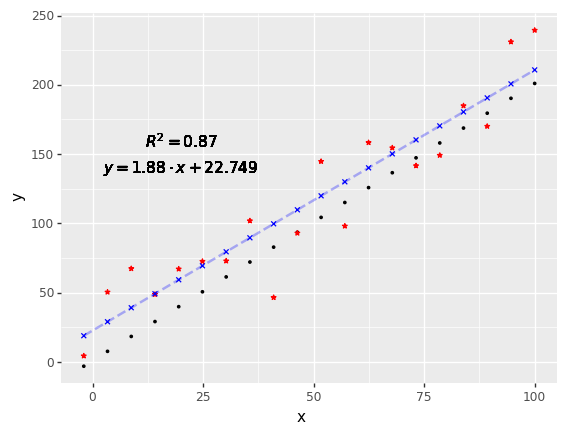

<ggplot: (162916949270)>

In [96]:
equation = r"$y={}\cdot x+{}$".format(round(model.coef_[0], 3), 
                                      round(model.intercept_, 3))
r_sq = r"$R^2={}$".format(round(model.score(X, y_noisy), 2))

(ggplot(df) + 
    geom_point(aes(x='x', y='y'), color="black", size=0.5) + 
    geom_point(aes(x='x', y='y_noisy'), color="red", shape="*", size=1.5) + 
    geom_point(aes(x='x', y='y_hat'), color="blue", shape="x", size=1.5) + 
    geom_line(aes(x='x', y='y_hat'), color="blue", linetype="dashed", alpha=0.3, size=1) +
    geom_text(x=20, y=160, label=r_sq) + 
    geom_text(x=20, y=140, label=equation))


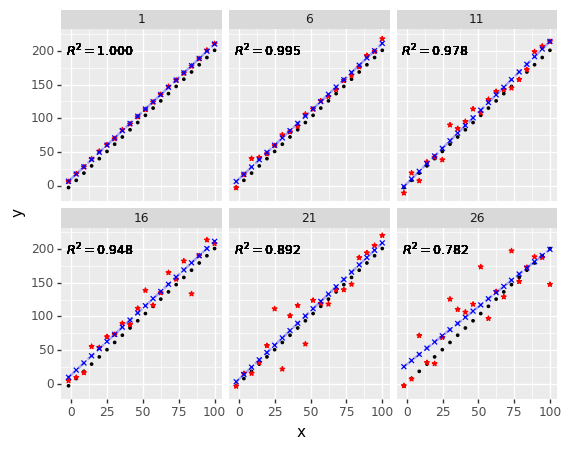

<ggplot: (162916658387)>

In [156]:
def add_noise(data, mu, sigma):
    """
    :param data: numpy array to add gaussian noise to
    :param mu: The expectation of the gaussian noise
    :param sigma: The standard deviation of the gaussian noise
    :return: np array of data with noise
    """
    return data + np.random.normal(loc=mu, scale=sigma, size=len(data))

def fit_model(x, y):
    """
    :param x:  numpy array of dataset samples 
    :param y: numpy array of response vector 
    :return: A fitted Linear Regression model using sklearn
    """
    return linear_model.LinearRegression().fit(x, y)    

def create_df(x, y, mu, sigma):
    """
    Return a DataFrame with the following columns (exact order and names): x, y, y_noisy, y_hat, r_squared, sigma
        1) y_noisy - should be the y values after noise was added
        2) y_hat - the model's prediction ofr the y values for the given x values.
        3) r_squared - the goodness of fit measurement of the fitted model
        4) sigma - the sigma value the values of this DataFrame were created with
    Hint: On what y values should the model be trained? (In the real world do we ever observe y itself?)
    :param x: The explanatory variable
    :param y: The response variable
    :param mu:  The expectation of the gaussian noise to add 
    :param sigma: The standard deviation of the gaussian noise to add
    :return: The created DataFrame
    """
    y_noisy = add_noise(y, mu, sigma)
    model = fit_model(x.reshape(-1, 1), y_noisy)
    y_hat = model.predict(x.reshape(-1, 1))
    r_sq = r"$R^2=%0.3f$" % model.score(x.reshape(-1, 1), y_noisy)
    return DataFrame({'x':x, 'y':y, 'y_noisy': y_noisy, 'y_hat': y_hat, 
                          'r_squared': r_sq, 'sigma': sigma})

def plot_lm_fitting_for_different_noises(x, y, mu, sigmas):
    """"
    :param x: The explanatory variable
    :param y: The response variable
    :param mu:  The expectation of the gaussian noise to add 
    :param sigmas: A list of standard deviation noises to apply to response data
    :return: A ggplot with the following:
        1) In black the original x-y points
        2) In red the x-y_noisy points (shape is `*`)
        3) In blue the x-y_hat points (shape is `x`)
        4) A dashed line for the x-y_hat - see geom_line (and linetype='dashed')
        5) Text showing the r_squared 
        6) One plot for each value of sigma
    Hint 1: `geom_text` also receices an `aes(...)` argument.
    Hint 2: Recall `facet_wrap` from previous lab
    """
    dfs = pd.concat([create_df(x,y,mu, s) for s in sigmas])
    return (ggplot(dfs) + 
            geom_point(aes(x='x', y='y'), color="black", size=0.5) + 
            geom_point(aes(x='x', y='y_noisy'), color="red", shape="*", size=1.5) + 
            geom_point(aes(x='x', y='y_hat'), color="blue", shape="x", size=1.5) + 
            geom_line(aes(x='x', y='y_hat'), color="blue", linetype="dashed", alpha=0.3, size=1) +
            geom_text(aes(label='r_squared'), x=20, y=200, size=9) + 
            facet_wrap("~sigma"))
    
# Simple testing code
x = np.linspace(-2, 100, 20)
y = 2*x + 1
# create_df(x, y, 1, 100)
plot_lm_fitting_for_different_noises(x, y, 10, np.arange(1, 27, 5))
